In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns

In [4]:
insurance = pd.read_csv("insurance.csv")
ins = insurance.copy()
ins


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(ins["sex"].unique())

['female' 'male']


<ipython-input-7-0ba4d02cd4de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ins.corr(), annot=True)


<Axes: >

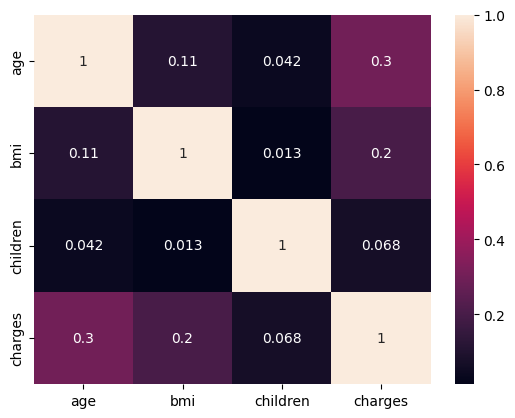

In [7]:
sns.heatmap(ins.corr(), annot=True)

In [8]:
ins = ins.replace({
    'sex': {
        'female': 0,
        'male': 1,
    },
    'smoker': {
        'no': 0,
        'yes': 1,
    },
    'region': {
        'southwest': 0,
        'southeast': 1,
        'northwest': 2,
        'northeast': 3,
    }
})

In [9]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


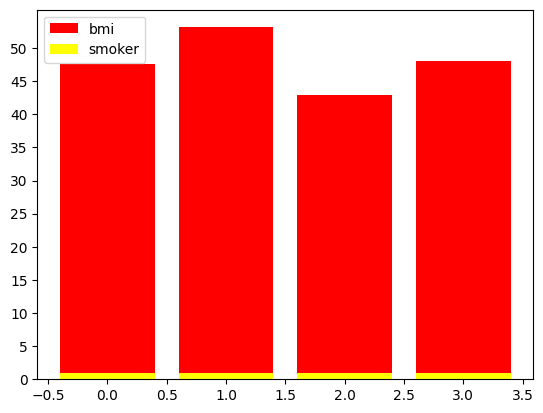

In [10]:
import matplotlib.pyplot as plt

plt.bar(ins["region"],ins['bmi'],label="bmi",color = "red")
plt.bar(ins['region'],ins['smoker'],label="smoker",color ="yellow")
plt.yticks(range(0, int(max(ins['bmi']))+1, 5))
plt.legend()
plt.show()

<Axes: >

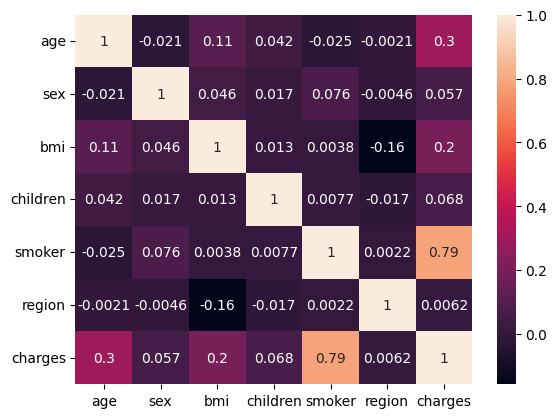

In [11]:
sns.heatmap(ins.corr(), annot=True)

In [55]:
from sklearn.model_selection  import train_test_split


X = ins.drop(['charges'], axis=1)
Y = ins['charges']

train_X, test_X,train_Y ,test_Y = train_test_split(X,Y,test_size = 0.2)


In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X,train_Y)

LinearRegression()

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


prediction = model.predict(test_X)
print(r2_score(test_Y, prediction))
print(mean_squared_error(test_Y,prediction))

0.7690185272101422
40997668.213517636


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=25)

rf_model.fit(train_X, train_Y)

predic= rf_model.predict(test_X)

r2 = r2_score(test_Y, predic)
mse = mean_squared_error(test_Y, predic)

print(r2)
print(mse)


0.86310859505415
24297309.7948775


In [84]:
X = ins.drop(['charges','region'], axis=1)
Y = ins['charges']

train_X, test_X,train_Y ,test_Y = train_test_split(X,Y,test_size = 0.2)

In [85]:
model = LinearRegression()
model.fit(train_X,train_Y)

LinearRegression()

In [86]:
prediction = model.predict(test_X)
print(r2_score(test_Y, prediction))
print(mean_squared_error(test_Y,prediction))

0.8141100458392987
28114724.9978928


In [87]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=25)

rf_model.fit(train_X, train_Y)

predic= rf_model.predict(test_X)

r2 = r2_score(test_Y, predic)
mse = mean_squared_error(test_Y, predic)

print(r2)
print(mse)

0.8908976440519659
16501067.784703681
